### First Exploration of the Data
This notebook contains first scripts for handling the .dcm files.

In [1]:
%matplotlib inline
import dicom
import os
import numpy
from matplotlib import pyplot as plt, cm

In [2]:
path_dicom = "../../data/LIDC-IDRI-0666/1.3.6.1.4.1.14519.5.2.1.6279.6001.150264634200093580367988090366/1.3.6.1.4.1.14519.5.2.1.6279.6001.325580698241281352835338693869/"
all_scans = []  # create an empty list
for dirName, subdirList, fileList in os.walk(path_dicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            all_scans.append(os.path.join(dirName,filename))

In [3]:
# Get ref file
ref_scan = dicom.read_file(all_scans[0]) # number is not important here, could take anyone
print(dir(ref_scan))

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
pixel_dims = (int(ref_scan.Rows), int(ref_scan.Columns), len(all_scans))

# Load spacing values (in mm)
pixel_spacing = (float(ref_scan.PixelSpacing[0]), float(ref_scan.PixelSpacing[1]), float(ref_scan.SliceThickness))

x = numpy.arange(0.0, (pixel_dims[0]+1)*pixel_spacing[0], pixel_spacing[0])
y = numpy.arange(0.0, (pixel_dims[1]+1)*pixel_spacing[1], pixel_spacing[1])
z = numpy.arange(0.0, (pixel_dims[2]+1)*pixel_spacing[2], pixel_spacing[2])

# The array is sized based on 'pixel_dims'
array_imgs = numpy.zeros(pixel_dims, dtype=ref_scan.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in all_scans:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    array_imgs[:, :, all_scans.index(filenameDCM)] = ds.pixel_array

['AccessionNumber', 'AcquisitionComments', 'AcquisitionDate', 'AcquisitionDateTime', 'AcquisitionNumber', 'AcquisitionTime', 'AdmittingDate', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'CompressionCode', 'ContentCreatorName', 'ContentDate', 'ContentTime', 'ConvolutionKernel', 'CurveDate', 'DataCollectionDiameter', 'DataSetSubtype', 'DataSetType', 'DeidentificationMethod', 'DistanceSourceToDetector', 'DistanceSourceToPatient', 'Exposure', 'ExposureTime', 'FillerOrderNumberImagingServiceRequest', 'FilterType', 'FocalSpots', 'FrameOfReferenceUID', 'GantryDetectorTilt', 'GeneratorPower', 'HighBit', 'ImageDimensions', 'ImageFormat', 'ImageGeometryType', 'ImageLocation', 'ImageOrientation', 'ImageOrientationPatient', 'ImagePosition', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'KVP', 'LastMenstrualDate', 'Location', 'LongitudinalTemporalInformationModified', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'Ove

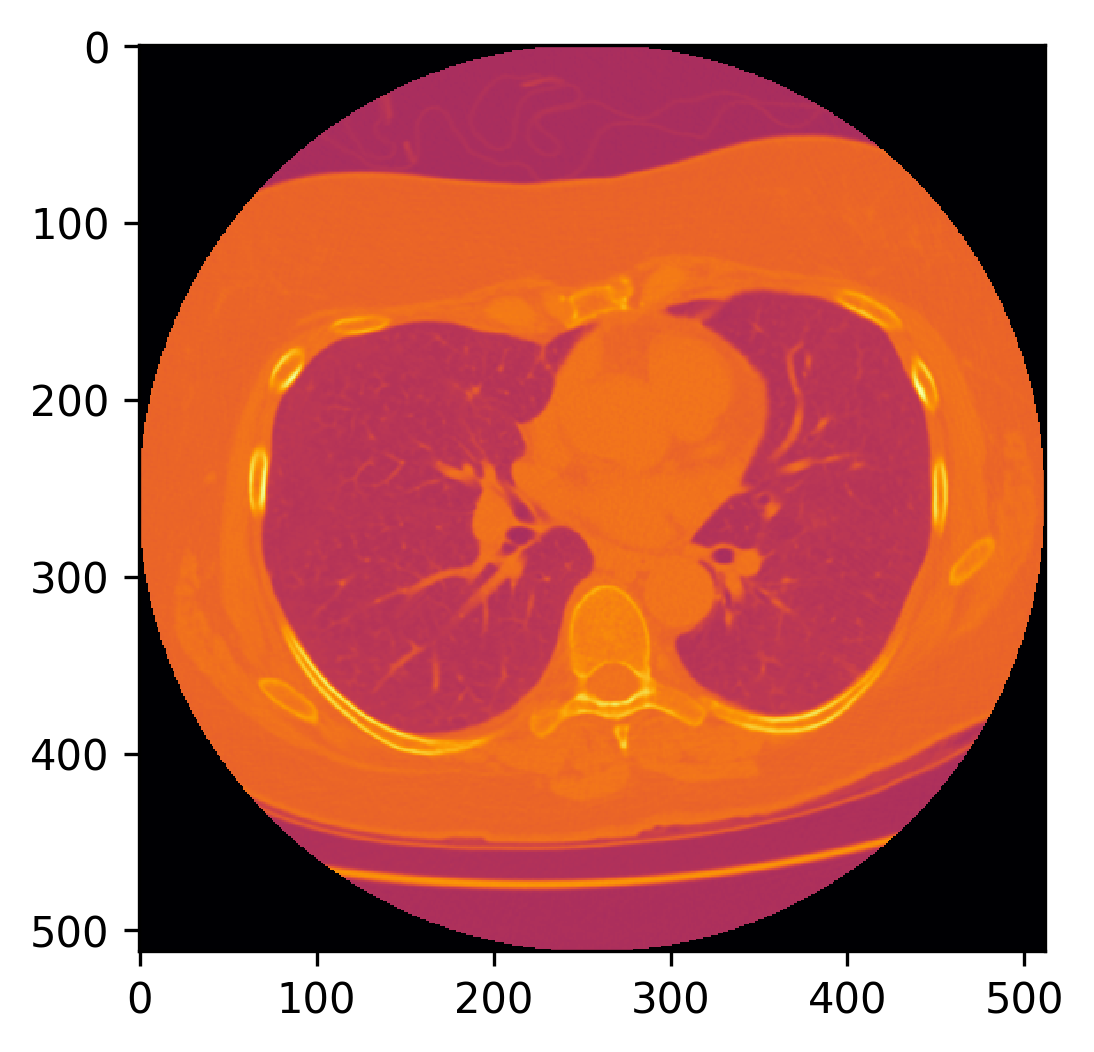

In [8]:
plt.figure(dpi=300)
plt.axes().set_aspect('auto', 'box')
plt.set_cmap(plt.inferno())
plt.imshow(array_imgs[:, :, 110])